In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import matplotlib as mpl
import sys
import os
import matplotlib as mpl
import re
import glob
os.chdir('C:\\Users\\chami\\Desktop\\Polymer_params_final\\ITP_gen')
pwd=os.getcwd()

INPUTS - N2200

In [106]:
# INPUTS - specific to N22000 
repeats = 10 #n'mer polymer, extendng from right to left ....
itpfile = 'N2200_monomer_CK_updated_newparams_cleaned.itp' 
output_itp = 'N2200_10mer_ITPGen_CK_VER9.itp'
trimer_log = 'Trimer_pop_cm5.log'

#Bonds
#    A-=====-Z

A = 1   #start H
Z = 160 #end H
Hook_A = 2 
Hook_Z = 34
force_const = [1, 0.1464, 322168.000] #between C-C conjugated bridging bond 
force_const_terminal = [1, 0.1080,307105.600] #between C-H terminal bond

linkerbonds = [Z, Hook_Z,force_const[0], force_const[1],force_const[2]]

#Angles 
# define all 4 angles between two units of a dimer
#    up-A-Z
#    Down-A-Z
#    A-Z-up
#    A-Z-down

linkeralup = [162, Z, Hook_Z, 1, 127.37, 585.760] #left up
linkeraldown = [161, Z, Hook_Z, 1, 122.62, 585.760] #left down S containing
linkerarup = [28, Hook_Z, Z, 1, 122.48, 527.184] #right up
linkerardown = [31, Hook_Z, Z, 1, 118.69, 537.811] #right down

#define 2 angles between end unit and terminal H - CAUTION - note that these two angles are in this order, other two is absent
AngH_3 = np.array([Z, Hook_Z, 28]) #left up
AngH_cons3 = [1, 122.260, 502.080]
AngH_4 = np.array([161, Z, Hook_Z]) #left up
AngH_cons4 = [1, 122.260, 502.080]

#Dihedrals - Linkers in propers-----------------------------------------------------
dihed_1 = np.array([162, Z, Hook_Z, 28]) #from left up up
dihed_cons1 = [3, 0.000, 0.000, 0.000, -0.000, -0.000, 0.000]
dihed_2 = np.array([161, Z, Hook_Z, 28]) #from left down up 
dihed_cons2 = [3, 0.000, 0.000, 0.000, -0.000, -0.000, 0.000] 
dihed_3 = np.array([162, Z, Hook_Z, 31]) #from left up down 
dihed_cons3 = [3, 1.3034, -4.3954, -21.2755, -11.9985, 13.7856, 12.7423] #- EXPLICITLY CALCULATED
dihed_4 = np.array([161, Z, Hook_Z, 31]) #from left down down
dihed_cons4 = [3, 0.000, 0.000, 0.000, -0.000, -0.000, 0.000]
                
# in ring propers - left
Dihed_1 = np.array([Z, Hook_Z, 28 , 35]) #from left up up
Dihed_cons1 = [3, 30.334, 0.000, -30.334, -0.000, -0.000, 0.000]
Dihed_2 = np.array([Z, Hook_Z, 28 , 23]) #from left down up
Dihed_cons2 = [3, 30.334, 0.000, -30.334, -0.000, -0.000, 0.000]
Dihed_3 = np.array([Z, Hook_Z, 31, 37]) #from left up down
Dihed_cons3 = [3, 30.334, 0.000, -30.334, -0.000, -0.000, 0.000]
Dihed_4 = np.array([Z, Hook_Z, 31, 25]) #from left down down
Dihed_cons4 = [3, 9.079, 0.000, -9.079, -0.000, -0.000, 0.000]

#in ring proper - right - only 3 because of thiophene group
Dihed_11 = np.array([Hook_Z, Z, 162, 164]) #from left up up
Dihed_cons11 = [3, 9.079, 0.000, -9.079, -0.000, -0.000, 0.000]
Dihed_22 = np.array([Hook_Z, Z, 162, 165]) #from left down up
Dihed_cons22 = [3, 30.334, 0.000, -30.334, -0.000, -0.000, 0.000]
Dihed_33 = np.array([Hook_Z, Z, 161, 163]) #from left up down
Dihed_cons33 = [3,  0.000, 0.000, 0.000, -0.000, -0.000, 0.000]
#------------------------------------------------------------------------

#Dihedrals - Impropers
dihedI_1 = np.array([162, Z, Hook_Z, 161]) #left atom centered 
dihedI_cons1 = [4, 180.000, 10.460,  2] #thiphene side
dihedI_2 = np.array([Z, Hook_Z, 28, 31]) #right atom centered
dihedI_cons2 = [4, 180.000, 10.460,  2]

#INPUTS END

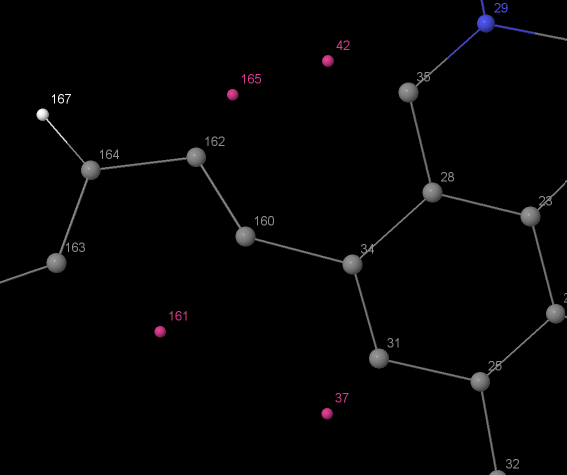

In [107]:
atomsdir = "[ atoms ]"
bondsdir = "[ bonds ]"
anglesdir = "[ angles ]"
dihedralsdir = "[ dihedrals ]"
dihedralsdir_improper = "; IMPROPER DIHEDRAL ANGLES"
dihedralsdir_proper = "; PROPER DIHEDRAL ANGLES"
pairsdir = "[ pairs ]"

#1. read itp save upto bonds directive save to new file
with open(itpfile, "r") as itp:
    allines = itp.readlines()

In [108]:
#1. Atoms directive
atomsdirective = []
printgo, printgo2 = False, False
for line in allines:  # search for start end line
    if atomsdir in line:
        printgo = True
    if bondsdir in line:
        printgo = False
    if printgo:
        atomsdirective.append(line.split())
            
atomsdirective_df = pd.DataFrame(atomsdirective[2:]) # skip header lines and 
monomeratoms_df = atomsdirective_df.iloc[:-1,1:] #remove index and remove terminating H !!!!!assume term H is last line
monomeratoms_df.index = (range(1,atomsdirective_df.shape[0]))

termeratoms_df = atomsdirective_df.iloc[1:,1:] #remove index and remove initiating H !!!!! assume init H is the first line
termeratoms_df.index = (range(1,atomsdirective_df.shape[0]))

nonmeratoms_df = atomsdirective_df.iloc[1:-1,1:] #'nonmer' contains the monomer with the two terminal bonds missing
nonmeratoms_df.index = range(1,atomsdirective_df.shape[0]-1)

#Multiply by number of repeat units, stitch together with the monomer 
nonmer_dir = pd.concat([nonmeratoms_df]*(repeats-1))
nonmer_dir 
allatoms_dir = pd.concat([monomeratoms_df, nonmer_dir], ignore_index=False)
allatoms_dir.index = range(1,((allatoms_dir.shape[0])+1))

#add terminating H to the atoms directive
termH = {1:"opls_9558", 2:1, 3:"H", 4:"H4J", 5:5, 6:0.0806, 7:1.0080}
allatoms_dir = allatoms_dir.append(termH, ignore_index=True)
allatoms_dir.index = range(1,((allatoms_dir.shape[0])+1))
allatoms_dir

,1,2,3,4,5,6,7
1,opls_800,1,H,H4I,1,0.2016,1.0080
2,opls_801,1,H,C01,1,-0.1848,12.0110
3,opls_S06,1,H,S06,1,0.033,32.0600
4,opls_803,1,H,C03,1,-0.1586,12.0110
5,opls_804,1,H,C04,1,-0.083,12.0110
...,...,...,...,...,...,...,...
1578,opls_9555,1,H,H4F,5,0.0806,1.0080
1579,opls_9556,1,H,H4G,5,0.0806,1.0080
1580,opls_9557,1,H,H4H,5,0.0806,1.0080
1581,opls_9558,1,H,H4I,5,0.0806,1.0080


In [109]:
#1. read log get charges - get cm5
def getcharges(loginputfile):
    
    optline = "!   Optimized Parameters   !"
    startline = "Hirshfeld charges, spin densities, dipoles, and CM5 charges using IRadAn="
    endline = " Hirshfeld charges with hydrogens summed into heavy atoms:"

    printgo, printgo2 = False, False
    optimizedlines, charges = [], []
    chargefile = open('charges.txt', 'w+')  # open file handler for writing

    with open(loginputfile, "r") as logfile:
        allines = logfile.readlines()
        for line in allines:  # search for start end line
            if optline not in line:
                printgo = True
            if startline in line:
                printgo2 = True
            if endline in line:
                printgo, printgo2 = False, False
            if printgo and printgo2:
                optimizedlines.append(line.split())
    chg = optimizedlines[2:-1] # skip header lines
    charges4 = pd.DataFrame()  #convert to dataframe
    
    for i in chg:
        charges.append(float(i[7]))
    chargefile.write(F'{charges} \n')

    chargefile.close()            #write to a text file for monitoring
    return pd.DataFrame(charges)

#Read trimer and extract charge populations
charges = getcharges(trimer_log)
charges.sum()

0   -0.00002
dtype: float64

In [110]:
#add charges from trimer  - will follow the order below, C and T populations extracted from trimer
#TA-C-C-C-C-TZ

TA = charges.iloc[:Z-1]
C = charges.iloc[Z-1:(2*Z-3)]
TZ = charges.iloc[2*Z-3:]

charge_pop = TA
for i in range(1, repeats-1):
    charge_pop = pd.concat([charge_pop, C], ignore_index=True)
charge_pop = pd.concat([charge_pop, TZ] ,ignore_index=True)
charge_pop.index = range(1,(allatoms_dir.shape[0])+1)
pd.set_option("display.precision", 5)
pd.options.display.float_format = '{:.5f}'.format
charge_pop = charge_pop.round(5)

In [111]:
allatoms_dir.iloc[:,5] = charge_pop.astype(float)

zerocharge_allatoms_dir = allatoms_dir.copy()
#zerocharge_allatoms_dir.iloc[:,5] = zerocharge_allatoms_dir.iloc[:,5].round(5)
zerocharge_allatoms_dir.iloc[:,5] = (allatoms_dir.iloc[:,5] - (allatoms_dir.iloc[:,5].sum()/allatoms_dir.shape[0])).round(5)
zerocharge_allatoms_dir.iloc[0,5] = zerocharge_allatoms_dir.iloc[0,5] - zerocharge_allatoms_dir.iloc[:,5].sum().round(5)
zerocharge_allatoms_dir.iloc[:,5].sum()
#zerocharge_allatoms_dir

-3.3306690738754696e-16

In [112]:
#2. Bonds directive

bondsdirective = []
printgo, printgo2 = False, False
for line in allines:
    if bondsdir in line:
        printgo = True
    if anglesdir in line:
        printgo = False
    if printgo:
        bondsdirective.append(line.split())
bondsdirective_df = pd.DataFrame(bondsdirective[1:-1])

#remove terminal bonds with H - template for nonmer
monomerbonds_df = bondsdirective_df[((bondsdirective_df.iloc[:,0]) != (str(Z))) & ((bondsdirective_df.iloc[:,1]) != (str(Z)))]
nonmerbonds_df = monomerbonds_df[((monomerbonds_df.iloc[:,0]) != (str(Z))) & ((monomerbonds_df.iloc[:,1]) != (str(A)))]
#stitch bondsdirective_df with nonmerbonds * repeats

polymerbonds = monomerbonds_df.copy()

for i in range(1, repeats):
    nonmerbonds_df.iloc[:,:2] = nonmerbonds_df.iloc[:,:2].astype(int)+ 158*i
    polymerbonds = pd.concat([polymerbonds, nonmerbonds_df ])
    nonmerbonds_df = monomerbonds_df[((monomerbonds_df.iloc[:,0]) != (str(Z))) & ((monomerbonds_df.iloc[:,1]) != (str(A)))]
polymerbonds.index = range(1, polymerbonds.shape[0]+1)

C:\Users\chami\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\chami\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [113]:
#add extra bonds

extrabonds = pd.DataFrame()
extrabonds_polymer = pd.DataFrame()
for i in range(repeats-1):
    extrabonds = pd.concat([(pd.DataFrame(linkerbonds[:2])+(158*i)).T, (pd.DataFrame(linkerbonds[2:])).T], axis=1, ignore_index=True)  
    extrabonds_polymer = pd.concat([extrabonds_polymer,extrabonds], axis=0, ignore_index=True)
extrabonds_polymer.iloc[:,2] = extrabonds_polymer.iloc[:,2].astype(int) #change int to str

#add terminal H bonds
terminalH = bondsdirective_df[(bondsdirective_df[0] == str(Z))] 
terminalH.iloc[:,:2] = terminalH.iloc[:,:2].astype(int)+(158*(repeats-1)) #Dihedrals for last H
terminalH

,0,1,2,3,4
158,1582,1456,1,0.1050,345196.736


In [114]:
#Add exclusions directive
exdir = []
with open("Exclusions_list.txt", "r") as ex:
    exlines = np.array(ex.readlines())
ex.close()
for line in exlines:
    exdir.append(line.split())
exdir_list = pd.DataFrame(exdir)
exdir_list = exdir_list.astype(int) # NO -1 if molecules are not periodic

In [115]:
with open("exout.txt", 'w+') as file2:
    for i in range(repeats):
        print (((exdir_list+158*i)).to_string(header=False, index=False), file=file2)
        #print(exdir_intra+158*i)
        #print(exdir_inter+158*i)
exdir = []
with open("Exout.txt", "r") as ex:
    exlines = np.array(ex.readlines())
ex.close()
for line in exlines:
    exdir.append(line.split())
exdir_list = pd.DataFrame(exdir)
exdir_list = exdir_list.astype(int)
exdir_list2 = np.array(exdir_list)
exdir_list2[exdir_list2 > (158*repeats)] -= (158*repeats)
exdir_df = pd.DataFrame(exdir_list2)

In [116]:
#3. Angles directive

anglesdirective = []
printgo, printgo2 = False, False
for line in allines:
    if anglesdir in line:
        printgo = True
    if dihedralsdir in line:
        printgo = False
    if printgo:
        anglesdirective.append(line.split())
anglesdirective_df = pd.DataFrame(anglesdirective[2:-1]) 
anglesdirective_df
#remove angles involving terminal H of the monomer - template for nonmer
monomerangles_df = anglesdirective_df[(anglesdirective_df[0] != str(Z)) & (anglesdirective_df[1] != str(Z)) & (anglesdirective_df[2] != str(Z))]
nonmerangles_df = monomerangles_df[(monomerangles_df[0] != str(A)) & (monomerangles_df[1] != str(A)) & (monomerangles_df[2] != str(A))]

#terminal H bonds - copy from last n'mer
#angles_terminalH = dihedralsdirective_proper_df[(dihedralsdirective_proper_df[0] == str(Z)) ]

angles_terminalH = pd.concat([(pd.DataFrame(AngH_3).T), (pd.DataFrame(AngH_cons3)).T], axis=1, ignore_index=True)
angles_terminalH = angles_terminalH.append(pd.concat([(pd.DataFrame(AngH_4).T), (pd.DataFrame(AngH_cons4)).T], axis=1, ignore_index=True))
#angles_terminalH.iloc[:,:4] = chop_terminalH.iloc[:,:4].astype(int)+(158*(repeats-1)) #Dihedrals for last H

#stitch bondsdirective_df with nonmerbonds * repeats
polymerangles = monomerangles_df

for i in range(1, repeats):
    nonmerangles_df.iloc[:,:3] = nonmerangles_df.iloc[:,:3].astype(int) + 158*i 
    polymerangles = pd.concat([polymerangles, nonmerangles_df])
    nonmerangles_df = monomerangles_df[(monomerangles_df[0] != str(A)) & (monomerangles_df[1] != str(A)) & (monomerangles_df[2] != str(A))]
polymerangles.index = range(1, polymerangles.shape[0]+1)


#add extra angles
extrangles = pd.DataFrame()
extrangles_polymer = pd.DataFrame([])

for i in range(repeats-1):
    extrangles = pd.concat([(pd.DataFrame(linkeralup[:3])+(158*i)).T, (pd.DataFrame(linkeralup[3:])).T], axis=1, ignore_index=True)  
    extrangles_polymer = pd.concat([extrangles_polymer,extrangles], axis=0, ignore_index=True)
    extrangles = pd.concat([(pd.DataFrame(linkeraldown[:3])+(158*i)).T, (pd.DataFrame(linkeraldown[3:])).T], axis=1, ignore_index=True)  
    extrangles_polymer = pd.concat([extrangles_polymer,extrangles], axis=0, ignore_index=True)
    extrangles = pd.concat([(pd.DataFrame(linkerarup[:3])+(158*i)).T, (pd.DataFrame(linkerarup[3:])).T], axis=1, ignore_index=True)  
    extrangles_polymer = pd.concat([extrangles_polymer,extrangles], axis=0, ignore_index=True)
    extrangles = pd.concat([(pd.DataFrame(linkerardown[:3])+(158*i)).T, (pd.DataFrame(linkerardown[3:])).T], axis=1, ignore_index=True)  
    extrangles_polymer = pd.concat([extrangles_polymer,extrangles], axis=0, ignore_index=True)

extrangles_polymer.iloc[:,3] = extrangles_polymer.iloc[:,3].astype(int) 
extrangles_polymer

#add two terminal angles with H 
terminalangH = anglesdirective_df[(anglesdirective_df[2] == str(Z))] #NEED WORK
terminalangH.iloc[:,:3] = terminalangH.iloc[:,:3].astype(int)+(158*(repeats-1)) #Dihedrals for last H
terminalangH

C:\Users\chami\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\chami\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,0,1,2,3,4,5
157,1450,1456,1582,1,122.260,502.080
161,1453,1456,1582,1,122.260,502.080


In [117]:
#4. Dihedrals directive 
#proper dihedrals

dihedralsdirective_proper = []
printgo, printgo2 = False, False
for line in allines:
    if dihedralsdir_proper in line:
        printgo = True
    if pairsdir in line:
        printgo = False
    if printgo:
        dihedralsdirective_proper.append(line.split())
dihedralsdirective_proper_df = pd.DataFrame(dihedralsdirective_proper[2:-1])
dihedralsdirective_proper_df

#remove propers involving terminal H - template for nonmer
monomerprop_df = dihedralsdirective_proper_df[(dihedralsdirective_proper_df[0] != str(Z)) & (dihedralsdirective_proper_df[1] != str(Z)) & (dihedralsdirective_proper_df[2] != str(Z)) & (dihedralsdirective_proper_df[3] != str(Z))]
nonmerprop_df = monomerprop_df[(monomerprop_df[0] != str(A)) & (monomerprop_df[1] != str(A)) & (monomerprop_df[2] != str(A)) & (monomerprop_df[3] != str(A))]

#stitch bondsdirective_df with nonmerbonds * repeats
polymerprop = monomerprop_df

for i in range(1, repeats):
    nonmerprop_df.iloc[:,:4] = nonmerprop_df.iloc[:,:4].astype(int) + 158*i 
    polymerprop = pd.concat([polymerprop, nonmerprop_df])
    nonmerprop_df = monomerprop_df[(monomerprop_df[0] != str(A)) & (monomerprop_df[1] != str(A)) & (monomerprop_df[2] != str(A)) & (monomerprop_df[3] != str(A))]
polymerprop.index = range(1, polymerprop.shape[0]+1)

#extra propers
extradihed_prop = pd.DataFrame()
dc_p = pd.DataFrame()

for i in range(repeats-1): #last nmer is not involved
    extradihed_prop = pd.concat([extradihed_prop, pd.DataFrame(dihed_1+(158*i))], axis=1, ignore_index=True)  
    dc_p = pd.concat([dc_p, pd.DataFrame(dihed_cons1)], axis=1, ignore_index=True)

    extradihed_prop = pd.concat([extradihed_prop, pd.DataFrame(dihed_2+(158*i))], axis=1, ignore_index=True)  
    dc_p = pd.concat([dc_p, pd.DataFrame(dihed_cons2)], axis=1, ignore_index=True)
    
    extradihed_prop = pd.concat([extradihed_prop, pd.DataFrame(dihed_3+(158*i))], axis=1, ignore_index=True)  
    dc_p = pd.concat([dc_p, pd.DataFrame(dihed_cons3)], axis=1, ignore_index=True)
    
    extradihed_prop = pd.concat([extradihed_prop, pd.DataFrame(dihed_4+(158*i))], axis=1, ignore_index=True)  
    dc_p = pd.concat([dc_p, pd.DataFrame(dihed_cons4)], axis=1, ignore_index=True)
    #In ring propers - left
    extradihed_prop = pd.concat([extradihed_prop, pd.DataFrame(Dihed_1+(158*i))], axis=1, ignore_index=True)  
    dc_p = pd.concat([dc_p, pd.DataFrame(Dihed_cons1)], axis=1, ignore_index=True)

    extradihed_prop = pd.concat([extradihed_prop, pd.DataFrame(Dihed_2+(158*i))], axis=1, ignore_index=True)  
    dc_p = pd.concat([dc_p, pd.DataFrame(Dihed_cons2)], axis=1, ignore_index=True)
    
    extradihed_prop = pd.concat([extradihed_prop, pd.DataFrame(Dihed_3+(158*i))], axis=1, ignore_index=True)  
    dc_p = pd.concat([dc_p, pd.DataFrame(Dihed_cons3)], axis=1, ignore_index=True)
    
    extradihed_prop = pd.concat([extradihed_prop, pd.DataFrame(Dihed_4+(158*i))], axis=1, ignore_index=True)  
    dc_p = pd.concat([dc_p, pd.DataFrame(Dihed_cons4)], axis=1, ignore_index=True)
    #In ring propers - right
    extradihed_prop = pd.concat([extradihed_prop, pd.DataFrame(Dihed_11+(158*i))], axis=1, ignore_index=True)  
    dc_p = pd.concat([dc_p, pd.DataFrame(Dihed_cons11)], axis=1, ignore_index=True)

    extradihed_prop = pd.concat([extradihed_prop, pd.DataFrame(Dihed_22+(158*i))], axis=1, ignore_index=True)  
    dc_p = pd.concat([dc_p, pd.DataFrame(Dihed_cons22)], axis=1, ignore_index=True)
    
    extradihed_prop = pd.concat([extradihed_prop, pd.DataFrame(Dihed_33+(158*i))], axis=1, ignore_index=True)  
    dc_p = pd.concat([dc_p, pd.DataFrame(Dihed_cons33)], axis=1, ignore_index=True)
    
    
extradihed_prop = extradihed_prop.T
extradihedral_proper_polymer = pd.concat([extradihed_prop, dc_p.T], axis=1, ignore_index=True)
extradihedral_proper_polymer.iloc[:,4] = "3" #change int to str'''

terminalpropH = dihedralsdirective_proper_df[(dihedralsdirective_proper_df[0] == str(Z))] #NEED WORK
terminalpropH.iloc[:,:4] = terminalpropH.iloc[:,:4].astype(int)+(158*(repeats-1)) #Dihedrals for last H
terminalpropH

C:\Users\chami\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\chami\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,0,1,2,3,4,5,6,7,8,9,10
179,1582,1456,1453,1447,3,58.576,0.000,-58.576,-0.000,-0.000,0.000
180,1582,1456,1453,1459,3,58.576,0.000,-58.576,-0.000,-0.000,0.000
182,1582,1456,1450,1457,3,-0.778,-2.335,0.000,3.113,-0.000,0.000
184,1582,1456,1450,1445,3,-0.778,-2.335,0.000,3.113,-0.000,0.000


In [118]:
#improper dihedrals (note the order is swtiched here - which is ok!)

dihedralsdirective_improper = []
printgo, printgo2 = False, False
for line in allines:
    if dihedralsdir_improper in line:
        printgo = True
    if dihedralsdir_proper in line:
        printgo = False
    if printgo:
        dihedralsdirective_improper.append(line.split())
dihedralsdirective_improper_df = pd.DataFrame(dihedralsdirective_improper[2:-2])


#remove impropers involving terminal H - template for nonmer
monomerimprop_df = dihedralsdirective_improper_df[(dihedralsdirective_improper_df[0] != str(Z)) & (dihedralsdirective_improper_df[1] != str(Z)) & (dihedralsdirective_improper_df[2] != str(Z)) & (dihedralsdirective_improper_df[3] != str(Z))]
nonmerimprop_df = monomerimprop_df[(monomerimprop_df[0] != str(A)) & (monomerimprop_df[1] != str(A)) & (monomerimprop_df[2] != str(A)) & (monomerimprop_df[3] != str(A))]

#stitch bondsdirective_df with nonmerbonds * repeats
polymerimprop = monomerimprop_df
for i in range(1, repeats):
    nonmerimprop_df.iloc[:,:4] = nonmerimprop_df.iloc[:,:4].astype(int) + 158*i 
    polymerimprop = pd.concat([polymerimprop, nonmerimprop_df])
    nonmerimprop_df = monomerimprop_df[(monomerimprop_df[0] != str(A)) & (monomerimprop_df[1] != str(A)) & (monomerimprop_df[2] != str(A)) & (monomerimprop_df[3] != str(A))]
polymerimprop.index = range(1, polymerimprop.shape[0]+1)

#extra impropers

extradihed_improp = pd.DataFrame()
dc_i = pd.DataFrame()
for i in range(repeats-1):
    
    extradihed_improp = pd.concat([extradihed_improp, pd.DataFrame(dihedI_1+(158*i))], axis=1, ignore_index=True)  
    dc_i = pd.concat([dc_i, pd.DataFrame(dihedI_cons1)], axis=1, ignore_index=True)
    
    extradihed_improp = pd.concat([extradihed_improp, pd.DataFrame(dihedI_2+(158*i))], axis=1, ignore_index=True)  
    dc_i = pd.concat([dc_i, pd.DataFrame(dihedI_cons2)], axis=1, ignore_index=True)
    
extradihed_improp = extradihed_improp.T
extradihedral_improper_polymer = pd.DataFrame()
extradihedral_improper_polymer = pd.concat([extradihed_improp, dc_i.T], axis=1, ignore_index=True)
extradihedral_improper_polymer.iloc[:,4] = "4" #change int to str
extradihedral_improper_polymer.iloc[:,7] = "2" #function type

terminalimpropH = dihedralsdirective_improper_df[(dihedralsdirective_improper_df[0] == str(Z))] #NEED WORK
terminalimpropH.iloc[:,:4] = terminalimpropH.iloc[:,:4].astype(int)+(158*(repeats-1)) #Dihedrals for last H
terminalimpropH

C:\Users\chami\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\chami\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,0,1,2,3,4,5,6,7
12,1582,1456,1450,1453,4,180.000,10.460,2


In [119]:
#n. Replace directive and save new file
body, atoms, bonds, angles, dihedrals_P, dihedrals_I = [], [], [], [], [], []

with open(output_itp, 'w+') as file:
        print(';Polymer parameter file developed by ChamikaraK University of Arizona | Monomer generated through LigParGen Sever Jorgensen Lab @Yale University. \n;Explicit Hirshfield charge populations (CM5) and torsional potentials @DFT OT (0.1553 bohr-1) HPBE 6-31G** \n', file=file)
        for line in allines:
            if line.startswith("[ atoms ]"):
                break
            else:
                body.append(line)
        body.append('\n')
        body.append('[ atoms ]')  # fill up missing part
        print(''.join(body), file=file)
        print(zerocharge_allatoms_dir.to_string(header=False), file=file, sep='\t')  # prints dataframe without header and index

        #print bonds
        bonds.append('\n')
        bonds.append('[ bonds ]') 
        print(''.join(bonds), file=file)
        print(polymerbonds.to_string(header=False, index=False), file=file, sep='\t \t')
        print('\n; extra bonds in linkers', file=file)
        print(extrabonds_polymer.to_string(header=False, index=False), file=file, sep='\t')
        print('\n; terminal bond for last H', file=file)
        print(terminalH.to_string(header=False, index=False), file=file, sep='\t')
        #add pair exclusions:
        print('\n[ exclusions ] \n', file=file)
        print (exdir_df.iloc[:-4,:].to_string(header=False, index=False), file=file) #last 4 lines removed - no head tail interactions
        
        #print angles
        angles.append('\n[ angles ]\n')
        angles.append(';  ai    aj    ak funct            c0            c1            c2            c3')
        print(''.join(angles), file=file)
        print(polymerangles.to_string(header=False, index=False), file=file, sep='\t')
        print('\n; extra angles in linkers', file=file)
        print(extrangles_polymer.to_string(header=False, index=False), file=file, sep='\t')
        print('\n; terminal angles with H', file=file)
        print(terminalangH.to_string(header=False, index=False), file=file, sep='\t')
        
        #print proper dihedrals 
        dihedrals_P.append('\n[ dihedrals ]\n; PROPER DIHEDRAL ANGLES ]')
        dihedrals_P.append('\n ;  ai    aj    ak    al funct            c0            c1            c2            c3            c4            c5 \n')
        print(''.join(dihedrals_P), file=file)
        print(polymerprop.to_string(header=False, index=False), file=file, sep='\t')
        print('\n; extra dihedrals of linkers', file=file)
        print(extradihedral_proper_polymer.to_string(header=False, index=False), file=file, sep='\t')
        print('\n; terminal dihedrals', file=file)
        print(terminalpropH.to_string(header=False, index=False), file=file, sep='\t')
        
        #print improper dihedrals
        dihedrals_I.append('\n[ dihedrals ]\n; IMPROPER DIHEDRAL ANGLES ]')
        dihedrals_I.append('\n ;  ai    aj    ak    al funct            c0            c1            c2            c3            c4            c5 \n')
        print(''.join(dihedrals_I), file=file)
        print(polymerimprop.to_string(header=False, index=False), file=file, sep='\t')
        print('\n; extra improper dihedrals of linkers', file=file)
        print(extradihedral_improper_polymer.to_string(header=False, index=False), file=file, sep='\t')
        print('\n; terminal improper', file=file)
        print(terminalimpropH.to_string(header=False, index=False), file=file, sep='\t')


In [120]:
#test residual charge
with open(output_itp, "r") as cg:
    allines = cg.readlines()
cgdirective = []
cg.close()
    
#1. Atoms directive
printgo, printgo2 = False, False
for line in allines:  # search for start end line
    if atomsdir in line:
        printgo = True
    if bondsdir in line:
        printgo = False
    if printgo:
        cgdirective.append(line.split())
            
cgdirective_df = pd.DataFrame(cgdirective[1:-1]) # skip header line
residue_charge = cgdirective_df.iloc[:,6].astype(float).sum()

In [121]:
residue_charge

-3.3306690738754696e-16